       Sample ID      INROW      ROWNO  Date (wat)          N          P  \
count      48.00  48.000000  48.000000   48.000000  48.000000  48.000000   
mean       24.50   1.750000   1.500000    8.000000   3.462083   0.288958   
std        14.00   0.252646   0.505291    3.300548   0.920058   0.112027   
min         1.00   1.500000   1.000000    4.000000   1.870000   0.170000   
25%        12.75   1.500000   1.000000    4.000000   2.757500   0.207500   
50%        24.50   1.750000   1.500000    8.000000   3.210000   0.260000   
75%        36.25   2.000000   2.000000   12.000000   4.365000   0.365000   
max        48.00   2.000000   2.000000   12.000000   5.090000   0.690000   

               K          S         CA         MG  ...         MO  \
count  48.000000  48.000000  48.000000  48.000000  ...  48.000000   
mean    3.896250   0.268125   2.720896   0.535979  ...   0.622500   
std     1.198211   0.054291   0.498934   0.135782  ...   0.287147   
min     2.130000   0.160000   1.729000 

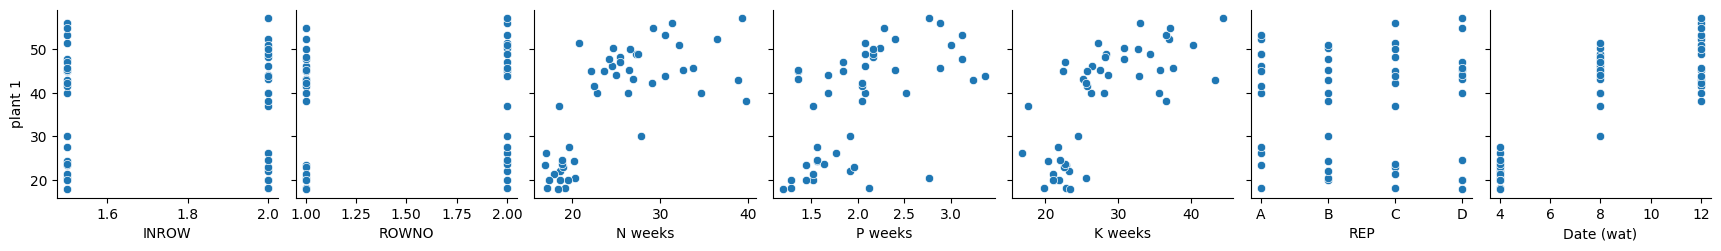

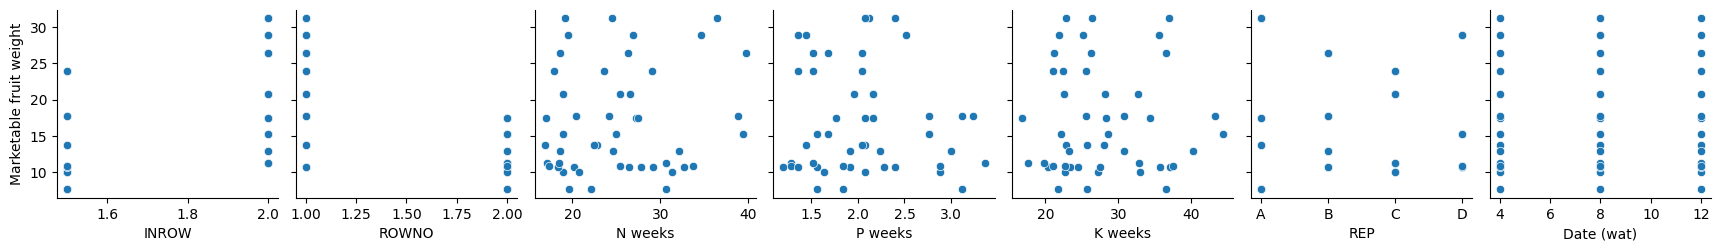

Score: 0.8376314050800668
R^2 Value: 0.8376314050800668
Score:Z 0.8376314050800668
R^2 Value:Z 0.8376314050800668


['knn_regression_model.pkl']

In [16]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import joblib
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/tomato data - Foliar analysis (1).csv')


print(df.describe())


import seaborn as sns
import matplotlib.pyplot as plt
df['N weeks']=df['N']*df['Date (wat)']
df['P weeks']=df['P']*df['Date (wat)']
df['K weeks']=df['K']*df['Date (wat)']
df['avg height'] = (df['plant 1']+df['plant 2']+df['plant 3']+df['plant 4']+df['plant 5'])/5
sns.pairplot(df, x_vars=['INROW', 'ROWNO',  'N weeks','P weeks','K weeks','REP' ,'Date (wat)'], y_vars='plant 1')
plt.show()


sns.pairplot(df, x_vars=['INROW', 'ROWNO', 'N weeks','P weeks','K weeks','REP' ,'Date (wat)'], y_vars='Marketable fruit weight')
plt.show()

X = df[['INROW', 'N', 'P','K', 'Date (wat)']]
z=df[['INROW', 'N', 'P','K']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
z_train, z_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)
predictions = knn_regressor.predict(X_test)
knn_regressor.fit(z_train, y_train)
predictionsz = knn_regressor.predict(z_test)

print('Score:', knn_regressor.score(X_test, y_test))
print('R^2 Value:', r2_score(y_test, predictions))
print('Score:Z', knn_regressor.score(z_test, y_test))
print('R^2 Value:Z', r2_score(y_test, predictionsz))



joblib.dump(knn_regressor, 'knn_regression_model.pkl')

In [38]:




#data = data.fillna(data.mean())


X = df[['N', 'P', 'K', 'INROW','Date (wat)']]
df['total weight']=df['Marketable fruit weight']+df['Unmarketable fruit weight']
y = df['total weight']/5

z = df['Marketable fruit number']/5
scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.1, random_state=42)

from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()

param_grid = {'n_neighbors': range(1, 8)}


grid_search = GridSearchCV(knn, param_grid, cv=5)


grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

grid_search.fit(X_train, z_train)
print(grid_search.best_params_)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

knn2 = KNeighborsRegressor(n_neighbors=5)
knn2.fit(X_train, z_train)



y_pred = knn.predict(X_test)
z_pred = knn2.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
msez = mean_squared_error(z_test, z_pred)
print('Mean Squared Error:', mse)
print('Mean Squared Error:', msez)
joblib.dump(knn, 'knn_regression_modelweight.pkl')
joblib.dump(knn2, 'knn_regression_modelnumbers.pkl')



{'n_neighbors': 5}
{'n_neighbors': 5}
Mean Squared Error: 2.0157460769440734
Mean Squared Error: 6.122323915191869


['knn_regression_modelnumbers.pkl']